In [16]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Andrés
[nltk_data]    |     Arango\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_da

In [2]:
#csv = files.upload()



In [2]:
df_amazon = pd.read_csv(r"sentiment labelled sentences\amazon_cells_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [3]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df_imbd = pd.read_csv(r"sentiment labelled sentences\imdb_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [5]:
df_imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  748 non-null    object
 1   target    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [8]:
df_yelp = pd.read_csv(r"sentiment labelled sentences\yelp_labelled.txt",sep="\t",header=None,names=['sentence','target'])

In [9]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df_sub1 = df_amazon.append(df_imbd,ignore_index=True)
df= df_sub1.append(df_yelp,ignore_index=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2748 non-null   object
 1   target    2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [12]:
df.head()

,sentence,target
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


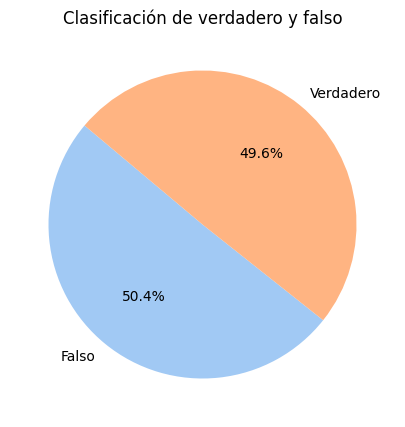

In [20]:
conteo =df["target"].value_counts()
plt.figure(figsize=(15,5))
plt.pie(conteo, labels=["Falso","Verdadero"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Clasificación de verdadero y falso")
plt.show()

In [13]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    # Pase el texto a minúscula
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

In [14]:
df['sentence'] = df['sentence'].apply(preprocess_text)

In [15]:
df.head()

,sentence,target
0,way plug u unless go converter .,0
1,"good case , excellent value .",1
2,great jawbone .,1
3,tied charger conversation lasting 45 minutes.m...,0
4,mic great .,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Obtenga su X y su y
X = df['sentence']
y = df['target']

# Codifique su y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Particione el conjunto en entrenamiento y prueba con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, train_size=0.2)

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Hágale padding a sus secuencias y obtenga aquellas para entrenamiento y aquellas para prueba

max_words = 10000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences_train = tok.texts_to_sequences(X_train)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_train = pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)

In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [18]:
dummy_clf = DummyClassifier()
dummy_clf.fit(sequences_matrix_train, y_train)

DummyClassifier()

In [19]:
y_pred = dummy_clf.predict(sequences_matrix_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recuperación: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')

Exactitud: 0.50
Precisión: 0.25
Recuperación: 0.50
Puntuación F1: 0.33


In [20]:
from sklearn.model_selection import GridSearchCV

dummy_clf = DummyClassifier()

param_grid = {
    'strategy': ['uniform', 'most_frequent', 'stratified', 'constant'],
    'constant': [0, 1, 2]  
}

grid_search = GridSearchCV(dummy_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(sequences_matrix_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")



Mejores hiperparámetros: {'constant': 2, 'strategy': 'uniform'}


In [21]:
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(sequences_matrix_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'Exactitud con mejores hiperparámetros: {accuracy_best:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision_best:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall_best:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1_best:.2f}')

Exactitud con mejores hiperparámetros: 0.48
Precisión con mejores hiperparámetros: 0.48
Recuperación con mejores hiperparámetros: 0.48
Puntuación F1 con mejores hiperparámetros: 0.48


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [24]:
max_len = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

In [25]:
def create_rnn_model(units=32):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
    model.add(SimpleRNN(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

    

In [26]:
rnn_model = create_rnn_model()

In [27]:
rnn_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 7s 441ms/step - loss: 0.6914 - accuracy: 0.5467 - val_loss: 0.6908 - val_accuracy: 0.5364
Epoch 2/5
7/7 [==============================] - 2s 245ms/step - loss: 0.6784 - accuracy: 0.6879 - val_loss: 0.6891 - val_accuracy: 0.6000
Epoch 3/5
7/7 [==============================] - 2s 242ms/step - loss: 0.6650 - accuracy: 0.8314 - val_loss: 0.6866 - val_accuracy: 0.6182
Epoch 4/5
7/7 [==============================] - 2s 253ms/step - loss: 0.6466 - accuracy: 0.8770 - val_loss: 0.6839 - val_accuracy: 0.5909
Epoch 5/5
7/7 [==============================] - 2s 242ms/step - loss: 0.6187 - accuracy: 0.9180 - val_loss: 0.6785 - val_accuracy: 0.6000


In [28]:
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=32, verbose=0)


In [41]:
param_grid = {
    'units': [50, 100],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(rnn_model, param_grid, cv=3, scoring=scoring_metrics,refit='accuracy')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

6/6 [==============================] - 1s 74ms/step
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 10, 'units': 100}


In [42]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1:.2f}')

69/69 [==============================] - 5s 71ms/step
Exactitud con mejores hiperparámetros: 0.67
Precisión con mejores hiperparámetros: 0.66
Recuperación con mejores hiperparámetros: 0.72
Puntuación F1 con mejores hiperparámetros: 0.69


In [31]:
def create_lstm_model(units=32):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len))
    model.add(LSTM(units=units, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [32]:
lstm_model = create_lstm_model()

In [33]:
lstm_model.fit(train_data, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 10s 594ms/step - loss: 0.6930 - acc: 0.5103 - val_loss: 0.6928 - val_acc: 0.6000
Epoch 2/5
7/7 [==============================] - 3s 450ms/step - loss: 0.6902 - acc: 0.7039 - val_loss: 0.6922 - val_acc: 0.5182
Epoch 3/5
7/7 [==============================] - 3s 480ms/step - loss: 0.6871 - acc: 0.6925 - val_loss: 0.6915 - val_acc: 0.5182
Epoch 4/5
7/7 [==============================] - 3s 441ms/step - loss: 0.6826 - acc: 0.7153 - val_loss: 0.6902 - val_acc: 0.5364
Epoch 5/5
7/7 [==============================] - 3s 443ms/step - loss: 0.6750 - acc: 0.7677 - val_loss: 0.6879 - val_acc: 0.6000


In [34]:
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=5, batch_size=32, verbose=0)

In [35]:
param_grid = {
    'units': [50, 100],
    'epochs': [5, 10],
    'batch_size': [32, 64]
}

grid_search = GridSearchCV(lstm_model, param_grid, cv=3, scoring='accuracy')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(train_data,y_train)

# Imprimir los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

6/6 [==============================] - 1s 164ms/step
Mejores hiperparámetros: {'batch_size': 64, 'epochs': 5, 'units': 50}


In [36]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime los resultados con los mejores hiperparámetros
print(f'Exactitud con mejores hiperparámetros: {accuracy:.2f}')
print(f'Precisión con mejores hiperparámetros: {precision:.2f}')
print(f'Recuperación con mejores hiperparámetros: {recall:.2f}')
print(f'Puntuación F1 con mejores hiperparámetros: {f1:.2f}')

69/69 [==============================] - 6s 88ms/step
Exactitud con mejores hiperparámetros: 0.50
Precisión con mejores hiperparámetros: 0.00
Recuperación con mejores hiperparámetros: 0.00
Puntuación F1 con mejores hiperparámetros: 0.00
